In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
import re
import pickle

from nltk.stem.porter import PorterStemmer
import nltk
from nltk.corpus import stopwords



In [3]:
df=pd.read_csv('C:\\Users\\MSI\\Desktop\\DL\\Datasets\\IMDB_Dataset\\IMDB_Dataset.csv')
df.head()
np.set_printoptions(precision=2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [13]:
df.loc[0,'review']

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [11]:
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

In [12]:
preprocessor(df.loc[0, 'review'])

'one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldn t dare forget pretty

In [14]:
df['review'] = df['review'].apply(preprocessor)

In [15]:
porter = PorterStemmer()

def tokenizer(text):
    return text.split()


def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [16]:
tokenizer('runners like running and thus they run')

['runners', 'like', 'running', 'and', 'thus', 'they', 'run']

In [17]:
tokenizer_porter('runners like running and thus they run')

['runner', 'like', 'run', 'and', 'thu', 'they', 'run']

In [20]:
stop = stopwords.words('english')
[w for w in tokenizer_porter('a runner likes running and runs a lot')[-10:]
if w not in stop]


['runner', 'like', 'run', 'run', 'lot']

In [21]:
tfidf=TfidfVectorizer(strip_accents=None, lowercase=False, tokenizer=tokenizer_porter, use_idf=True, norm='l2',smooth_idf=True)

x=tfidf.fit_transform(df.review);
y=df.sentiment.values

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

clf=LogisticRegressionCV(cv=5,
                        scoring='accuracy',
                        random_state=0,
                        n_jobs=-1,
                        verbose=3,
                        max_iter=300).fit(x_train,y_train)
saved_model=open('saved_model.sav','wb')
pickle.dump(clf,saved_model)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   51.7s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   54.5s finished


In [24]:
saved_model.close()
file='saved_model.sav'
saved_clf=pickle.load(open(file,'rb'))

In [25]:
y_predict=saved_clf.predict(x_test)
saved_clf.score(x_test,y_test)

0.89472

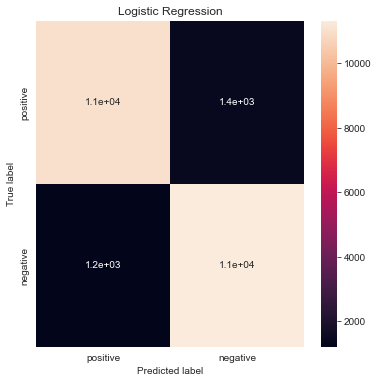

In [26]:
cm=confusion_matrix(y_test,y_predict)
cm
cm_df = pd.DataFrame(cm,
                     index = ['positive','negative'],
                     columns = ['positive','negative'])

plt.figure(figsize=(6,6))
sns.heatmap(cm_df, annot=True)

plt.title('Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()